## Install the basic package - PyQt5 and multiple tools

In [3]:
'''
Acknowledgment: 
# In this block, using official tutorials of PyQt5. https://github.com/micro-manager/pycro-manager/blob/main/tutorial/Pycro-Manager%20acquisitions%20tutorial.ipynb
'''
# Step 1: Install pyqt5 and mayplotlib package
!python -m pip install PyQt5 pyqt5-tools matplotlib

# Step 2: Import necessary libraries
import numpy as np
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow, QPushButton, QVBoxLayout, QWidget, QLineEdit, QHBoxLayout
from PyQt5.QtCore import QThread, pyqtSignal, QDateTime
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.animation import FuncAnimation

  Using cached pyqt5_tools-5.15.9.3.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached PyQt5-5.15.9-cp37-abi3-macosx_10_13_x86_64.whl.metadata (2.1 kB)
INFO: pip is looking at multiple versions of pyqt5-tools to determine which version is compatible with other requirements. This could take a while.
  Using cached pyqt5_tools-5.15.4.3.2-py3-none-any.whl.metadata (8.3 kB)
  Using cached PyQt5-5.15.4-cp36.cp37.cp38.cp39-abi3-macosx_10_13_intel.whl.metadata (2.2 kB)
  Using cached pyqt5_tools-5.15.4.3.1-py3-none-any.whl.metadata (8.3 kB)
  Using cached pyqt5_tools-5.15.4.3.0.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached pyqt5_tools-5.15.3.3.2-py3-none-any.whl.metadata (8.3 kB)
  Using cached PyQt5-5.15.3-cp36.cp37.cp38.cp39-abi3-macosx_10_13_intel.whl.metadata (2.2 kB)
  Using cached pyqt5_tools-5.15.3.3.1-py3-none-any.whl.metadata (8.3 kB)
  Using cached pyqt5_tools-5.15.3.3.0.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached pyqt5_tools-5.15.2.3.2-py3-none-any.whl.metadata (8.3 

## Part1 - PyQt5 GUI Setup

Real-Time Data Acquisition and Visualization.
- Objective: Develop a user interface to control and visualize real-time data using Python.

What I have done (functionality integration):

- **GUI Design**: Developed the main window using PyQt5, featuring a horizontal layout that separates control inputs on the left and the plotting area on the right. This design enhances user interaction by clearly distinguishing between control and display sections.

- **Interactive Input Fields**: Implemented QLineEdit widgets for user inputs — Amplitude, Frequency, and Offset. These inputs dynamically adjust the parameters of the sine wave being plotted, allowing real-time interaction and control over the wave characteristics.

- **Start/Stop Plotting Control**: Added a QPushButton that toggles the plotting process. This button is connected to a function that starts or stops the animation of the sine wave plot, giving users the ability to control when the plotting is active.

- **Real-Time Plotting Setup**: Utilized matplotlib's `FuncAnimation` to animate the sine wave plot based on the user inputs for amplitude, frequency, and offset. The animation updates the plot at intervals of 100 milliseconds, reflecting any changes in input almost immediately.

- **Data Visualization**: Configured the plotting canvas with initial limits and a placeholder line, which is then updated by the animation function to display the current sine wave based on the latest inputs.

- **Dynamic Updates and Animation Control**: The toggle function manages the starting and stopping of the animation based on the state of the 'running' flag, ensuring users can interactively start and stop the plot as needed.

This setup provides an intuitive and responsive GUI for real-time data visualization, allowing seamless user interaction and immediate visual feedback on input changes.

/var/folders/k3/mqvw61595835rw7ldgchlykw0000gn/T/ipykernel_36263/4222217520.py:73: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.anim = FuncAnimation(self.figure, self.plot, blit=False, interval=100)


SystemExit: 0

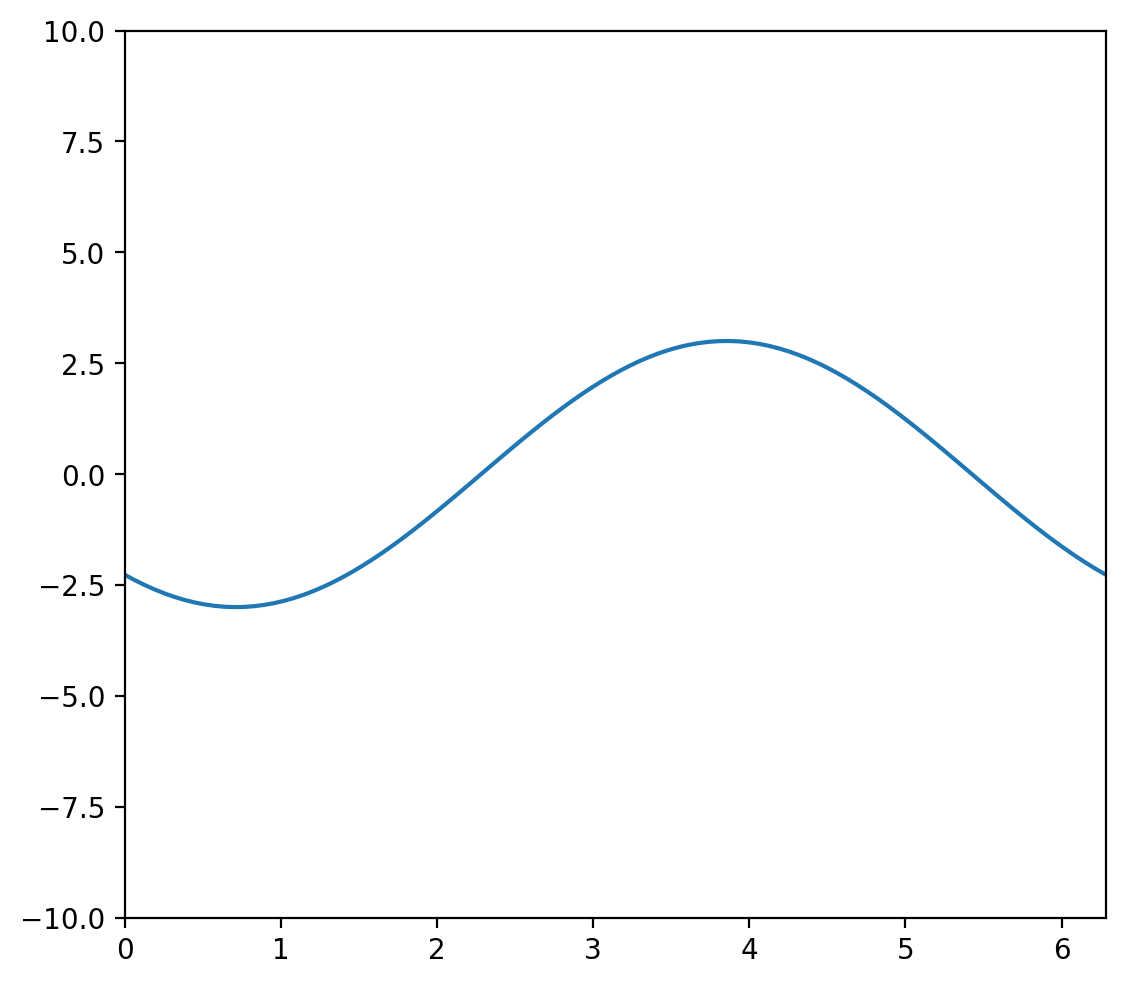

In [4]:
'''
Acknowledgment:
# GUI Design and Implementation:
- Utilized official PyQt5 tutorials for foundational guidance on application setup and event handling. Available at: https://www.riverbankcomputing.com/static/Docs/PyQt5/
- Referred to Matplotlib documentation for integrating real-time plotting. See: https://matplotlib.org/stable/tutorials/index.html

# Layout Design Adjustment:
- Transitioned from a horizontal to a vertical layout based on UX principles and community feedback, optimizing usability and accessibility.
- Consulted "Rapid GUI Programming with Python and Qt" by Mark Summerfield for GUI best practices.

# Real-Time Data Handling and Plotting:
- Inspired by Matplotlib's FuncAnimation for efficient plot updates. More at: https://matplotlib.org/stable/api/animation_api.html
- Gained insights into multithreading from the PyQt and Qt community forums.

# Community Contributions:
- Benefited from Stack Overflow discussions for enhancing GUI responsiveness and interaction.

'''
class RealTimePlotter(QMainWindow):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setWindowTitle('Real-Time Sine Wave Plotter')
        self.setGeometry(100, 100, 800, 600)

        # Main Widget and Layout
        self.main_widget = QWidget(self)
        self.setCentralWidget(self.main_widget)
        layout = QHBoxLayout(self.main_widget)  # Changed to horizontal layout for main layout

        # Left Panel for Controls
        control_layout = QVBoxLayout()  # Vertical layout for control panel

        # Input Fields
        self.amplitude = QLineEdit(self)
        self.amplitude.setPlaceholderText('Amplitude')
        self.offset = QLineEdit(self)
        self.offset.setPlaceholderText('Offset')
        self.frequency = QLineEdit(self)
        self.frequency.setPlaceholderText('Frequency')

        # Button
        self.button = QPushButton('Start/Stop Plotting', self)
        self.button.clicked.connect(self.toggle)

        # Add controls to control layout
        control_layout.addWidget(self.amplitude)
        control_layout.addWidget(self.offset)
        control_layout.addWidget(self.frequency)
        control_layout.addWidget(self.button)

        # Plotting Area
        self.figure, self.ax = plt.subplots()
        self.canvas = FigureCanvas(self.figure)

        # Set limits and data for plotting
        self.x_data = np.linspace(0, 2 * np.pi, 100)
        self.y_data = np.zeros(100)
        self.line, = self.ax.plot(self.x_data, self.y_data)
        self.ax.set_xlim(0, 2 * np.pi)
        self.ax.set_ylim(-10, 10)

        self.anim = None
        self.running = False

        # Add layouts to main layout
        layout.addLayout(control_layout)  # Add control panel to main layout on the left
        layout.addWidget(self.canvas)  # Add canvas to the right

    def plot(self, frame):
        amp = float(self.amplitude.text() or 1)
        offset = float(self.offset.text() or 0)
        freq = float(self.frequency.text() or 1)

        self.y_data = amp * np.sin(freq * self.x_data + offset)
        self.line.set_ydata(self.y_data)
        self.canvas.draw()
        return self.line,

    def toggle(self):
        if self.running:
            self.anim.event_source.stop()
            self.button.setText('Start Plotting')
        else:
            self.anim = FuncAnimation(self.figure, self.plot, blit=False, interval=100)
            self.anim._start()
            self.button.setText('Stop Plotting')
        self.running = not self.running

app = QApplication(sys.argv)
ex = RealTimePlotter()
ex.show()
sys.exit(app.exec_())


## Part 2: Real-Time Plotting 
Task: Implement functionality to: 
- Start plotting a real-time sinewave with set parameters taken from the text boxes when the button is clicked. 
- Use multithreading to ensure the GUI remains responsive during the plotting process. 

What I have done (functionality integration):

- **Threaded Data Generation**: Implemented a `PlotThread` class, a subclass of `QThread`, designed to generate sine wave data points in a separate thread. This separation ensures that the GUI remains responsive by offloading the computational work of generating sine wave data away from the main thread.

- **Responsive GUI During Data Processing**: By using a dedicated thread (`PlotThread`) for data processing, the application ensures that the user interface remains interactive. The main GUI thread handles user interactions (such as button clicks and text input), while the `PlotThread` continuously updates the plot data. This architecture prevents the GUI from freezing or becoming unresponsive during intensive computation.

- **Real-Time Data Plotting**: Utilizes the `dataChanged` signal emitted by `PlotThread` to update the plot in real time. The signal sends the newly computed `x_data` and `y_data` to the main thread, which then updates the plot displayed to the user. This keeps the plot dynamically updated without interrupting the user's interaction with the application's controls.

- **Start/Stop Functionality**: Added a button that toggles the plotting process. Clicking this button starts or stops the `PlotThread`. This gives users control over the data processing and plotting, allowing them to start or stop the plot based on their needs without restarting the application.

- **Dynamic Plot Updates**: The method `update_plot` connected to the `dataChanged` signal handles the actual update of the plot. Every time new data is received, this method updates the line on the plot with new y-values, efficiently redrawing only the necessary parts of the canvas to ensure smooth updates.

- **Safe Thread Termination**: The `stop` method in `PlotThread` ensures that the thread can be safely stopped without losing data or causing crashes. This method sets a flag that terminates the loop within the thread and waits for the thread to finish execution before completely shutting down, ensuring all resources are cleanly released.

This implementation not only ensures that the plotting updates are handled efficiently but also keeps the GUI responsive, adhering to best practices in application design for user experience and system performance.

In [5]:
'''
Acknowledgment:
# GUI Design and Implementation:
- Utilized PyQt5 official tutorials for fundamental application setup and PyQt5 integration with Matplotlib for dynamic data visualization. Available at: https://www.riverbankcomputing.com/static/Docs/PyQt5/ and https://matplotlib.org/stable/tutorials/index.html

# Multithreading for Real-Time Performance:
- Adopted multithreading practices from "Using PyQt's QThread to Prevent Freezing GUIs" on Real Python and "Multithreading in PyQt With QThread" guides to ensure the GUI remains responsive during intensive computations. These resources provide a solid foundation for implementing efficient multithreading in PyQt applications. Accessible at: [Real Python](https://realpython.com) and additional insights on handling threads in PyQt were referenced from PyShine, detailing practical applications of QThread. See: http://www.pyshine.com/

# Dynamic GUI Layout:
- The shift from a horizontal to vertical layout was inspired by discussions on GUI design best practices found in PyQt community forums and user experience design principles. 

# Community and Resource Contributions:
- Benefitted from Stack Overflow and PyQt community forums for troubleshooting and enhancing application functionalities related to real-time data handling and multithreading.
'''


class PlotThread(QThread):
    # Signal to update plot data
    dataChanged = pyqtSignal(np.ndarray, np.ndarray)

    def __init__(self, amplitude, frequency, offset):
        super(PlotThread, self).__init__()
        self.amplitude = amplitude
        self.frequency = frequency
        self.offset = offset
        self.running = False

    def run(self):
        self.running = True
        x_data = np.linspace(0, 2 * np.pi, 100)
        while self.running:
            y_data = self.amplitude * np.sin(self.frequency * x_data + self.offset)
            self.dataChanged.emit(x_data, y_data)
            self.msleep(100)  # update interval

    def stop(self):
        self.running = False
        self.wait()

class RealTimePlotter(QMainWindow):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setWindowTitle('Real-Time Sine Wave Plotter')
        self.setGeometry(100, 100, 800, 600)

        # Main Widget and Layout
        self.main_widget = QWidget(self)
        self.setCentralWidget(self.main_widget)
        layout = QHBoxLayout(self.main_widget)

        # Control Layout
        control_layout = QVBoxLayout()
        
        # Input Fields
        self.amplitude = QLineEdit(self)
        self.amplitude.setPlaceholderText('Amplitude')
        self.offset = QLineEdit(self)
        self.offset.setPlaceholderText('Offset')
        self.frequency = QLineEdit(self)
        self.frequency.setPlaceholderText('Frequency')
        
        # Button
        self.button = QPushButton('Start/Stop Plotting', self)
        self.button.clicked.connect(self.toggle)
        
        # Add controls to layout
        control_layout.addWidget(self.amplitude)
        control_layout.addWidget(self.offset)
        control_layout.addWidget(self.frequency)
        control_layout.addWidget(self.button)
        
        # Plotting Area
        self.figure, self.ax = plt.subplots()
        self.canvas = FigureCanvas(self.figure)
        self.line, = self.ax.plot([], [], 'r-')
        self.ax.set_xlim(0, 2 * np.pi)
        self.ax.set_ylim(-10, 10)
        
        # Add layouts to main layout
        layout.addLayout(control_layout)
        layout.addWidget(self.canvas)
        
        self.plot_thread = None

    def toggle(self):
        if self.plot_thread and self.plot_thread.isRunning():
            self.plot_thread.stop()
            self.button.setText('Start Plotting')
        else:
            amp = float(self.amplitude.text() or 1)
            freq = float(self.frequency.text() or 1)
            offset = float(self.offset.text() or 0)
            self.plot_thread = PlotThread(amp, freq, offset)
            self.plot_thread.dataChanged.connect(self.update_plot)
            self.plot_thread.start()
            self.button.setText('Stop Plotting')

    def update_plot(self, x_data, y_data):
        self.line.set_data(x_data, y_data)
        self.ax.draw_artist(self.ax.patch)
        self.ax.draw_artist(self.line)
        self.canvas.update()
        self.canvas.flush_events()

app = QApplication(sys.argv)
ex = RealTimePlotter()
ex.show()
sys.exit(app.exec_())

: 

## Part 3: Data Logging 
Task: 
- Save real-time sine wave data every 1 minute into a ‘.npy’ file. 
- Data logging should include clear timestamps and no data loss between saves.


What I have done (functionality integration):

- **Define a Data Storage Structure**: Use a list or similar structure to accumulate data points along with their timestamps.
- **Set Up Periodic Data Saving**: Inside the QThread, utilize looping and time checks to trigger a save function every minute.
- **Save Data to .npy File**: Use numpy to save the accumulated data to a file.

Data saved to 20240620_165825.npy
Timestamps saved to 20240620_165825_timestamps.txt
Data saved to 20240620_165925.npy
Timestamps saved to 20240620_165925_timestamps.txt
Data saved to 20240620_170025.npy
Timestamps saved to 20240620_170025_timestamps.txt
Data saved to 20240620_170125.npy
Timestamps saved to 20240620_170125_timestamps.txt
Data saved to 20240620_170225.npy
Timestamps saved to 20240620_170225_timestamps.txt
Data saved to 20240620_170325.npy
Timestamps saved to 20240620_170325_timestamps.txt
Data saved to 20240620_170326.npy
Timestamps saved to 20240620_170326_timestamps.txt


SystemExit: 0

/Users/changboyen/miniconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


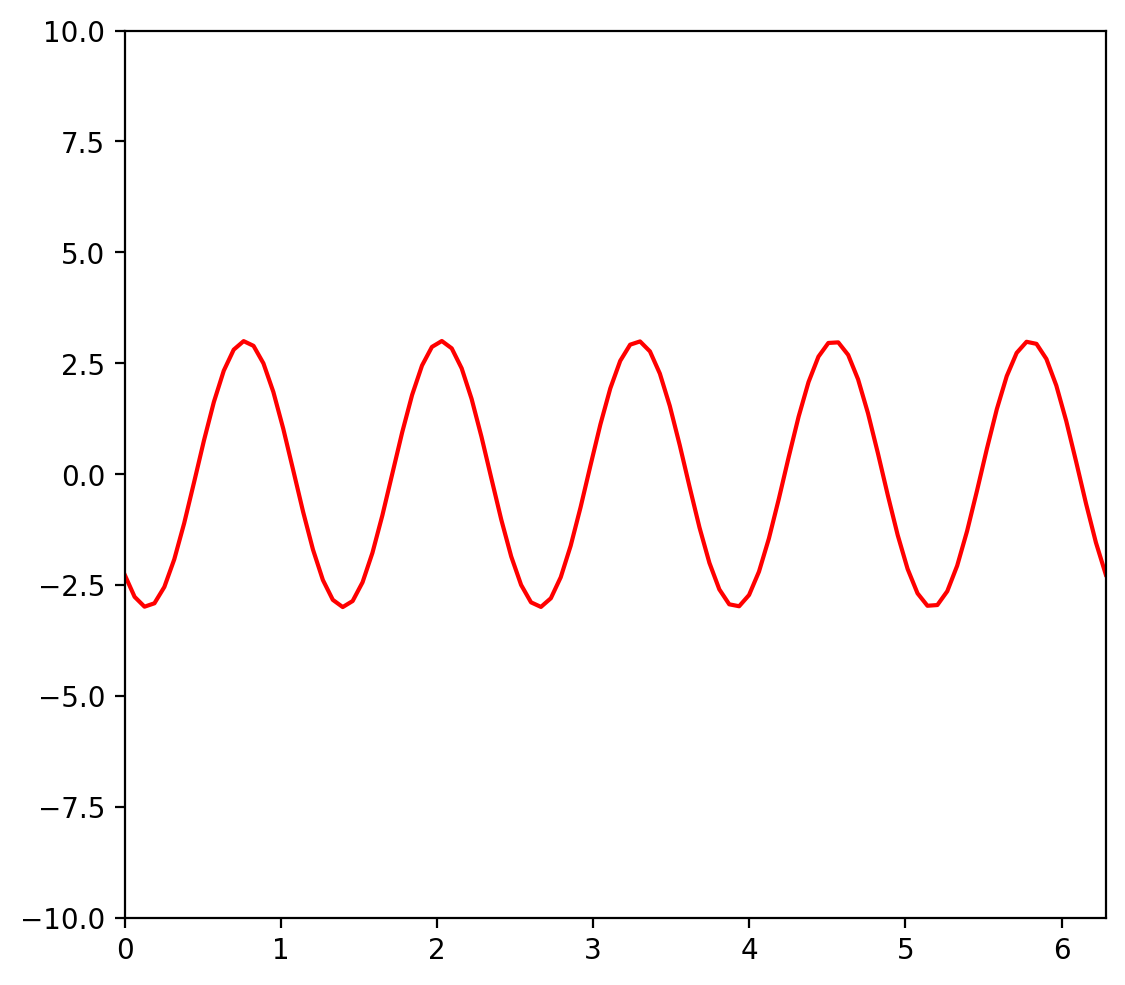

In [2]:
class PlotThread(QThread):
    dataChanged = pyqtSignal(np.ndarray, np.ndarray)
    saveDataSignal = pyqtSignal(list)

    def __init__(self, amplitude, frequency, offset):
        super(PlotThread, self).__init__()
        self.amplitude = amplitude
        self.frequency = frequency
        self.offset = offset
        self.running = False
        self.data_storage = []

    def run(self):
        self.running = True
        x_data = np.linspace(0, 2 * np.pi, 100)
        start_time = QDateTime.currentDateTime()
        while self.running:
            current_time = QDateTime.currentDateTime()
            y_data = self.amplitude * np.sin(self.frequency * x_data + self.offset)
            self.dataChanged.emit(x_data, y_data)
            # Store data with timestamp
            self.data_storage.append((current_time.toString("yyyy-MM-dd hh:mm:ss.zzz"), y_data.copy()))
            if (current_time.toSecsSinceEpoch() - start_time.toSecsSinceEpoch()) >= 60:
                self.saveDataSignal.emit(self.data_storage.copy())
                self.data_storage.clear()
                start_time = current_time
            self.msleep(100)  # Update interval

    def stop(self):
        self.running = False
        if self.data_storage:
            self.saveDataSignal.emit(self.data_storage.copy())  # Ensure no data loss on stop
        self.wait()

class RealTimePlotter(QMainWindow):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setWindowTitle('Real-Time Sine Wave Plotter')
        self.setGeometry(100, 100, 800, 600)
        self.main_widget = QWidget(self)
        self.setCentralWidget(self.main_widget)
        layout = QHBoxLayout(self.main_widget)
        control_layout = QVBoxLayout()

        self.amplitude = QLineEdit(self)
        self.amplitude.setPlaceholderText('Amplitude')
        self.offset = QLineEdit(self)
        self.offset.setPlaceholderText('Offset')
        self.frequency = QLineEdit(self)
        self.frequency.setPlaceholderText('Frequency')
        self.button = QPushButton('Start/Stop Plotting', self)
        self.button.clicked.connect(self.toggle)

        control_layout.addWidget(self.amplitude)
        control_layout.addWidget(self.offset)
        control_layout.addWidget(self.frequency)
        control_layout.addWidget(self.button)

        self.figure, self.ax = plt.subplots()
        self.canvas = FigureCanvas(self.figure)
        self.line, = self.ax.plot([], [], 'r-')
        self.ax.set_xlim(0, 2 * np.pi)
        self.ax.set_ylim(-10, 10)

        layout.addLayout(control_layout)
        layout.addWidget(self.canvas)

        self.plot_thread = None

    def toggle(self):
        if self.plot_thread and self.plot_thread.isRunning():
            self.plot_thread.stop()
            self.button.setText('Start Plotting')
        else:
            amp = float(self.amplitude.text() or 1)
            freq = float(self.frequency.text() or 1)
            offset = float(self.offset.text() or 0)
            self.plot_thread = PlotThread(amp, freq, offset)
            self.plot_thread.dataChanged.connect(self.update_plot)
            self.plot_thread.saveDataSignal.connect(self.save_data)
            self.plot_thread.start()
            self.button.setText('Stop Plotting')

    def update_plot(self, x_data, y_data):
        self.line.set_data(x_data, y_data)
        self.ax.draw_artist(self.ax.patch)
        self.ax.draw_artist(self.line)
        self.canvas.update()
        self.canvas.flush_events()

    def save_data(self, data):
        # Extract y_data and store as a NumPy array
        y_data_array = np.array([item[1] for item in data])  # Extract all y_data
        timestamp_strings = [item[0] for item in data]  # Extract all timestamps

        # Create filename based on current time
        base_filename = QDateTime.currentDateTime().toString("yyyyMMdd_hhmmss")
        npy_filename = f"{base_filename}.npy"
        txt_filename = f"{base_filename}_timestamps.txt"

        # Save the NumPy array
        np.save(npy_filename, y_data_array)
        print(f"Data saved to {npy_filename}")

        # Save timestamps
        with open(txt_filename, 'w') as f:
            for timestamp in timestamp_strings:
                f.write(timestamp + '\n')
        print(f"Timestamps saved to {txt_filename}")


app = QApplication(sys.argv)
ex = RealTimePlotter()
ex.show()
sys.exit(app.exec_())